### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import seaborn as sns

### Load Data From Yahoo Finance

In [58]:
#stocks = ["MRNA", "PFE", "JNJ", "GOOGL", "FB", "AAPL", "COST", "WMT", "KR", "JPM", "BAC", "HSBC"]
assets = 'KR AAPL XPO WMT PFE FDX MA JPM MRNA GOOGL COST BAC HSBC OXY TSLA MSFT'

In [60]:
df = yf.download(assets, start='2010-10-01', end='2021-10-01')
df.head()

[*********************100%***********************]  16 of 16 completed


Adj Close                                                         \
                AAPL        BAC       COST        FDX      GOOGL       HSBC   
Date                                                                          
2010-09-30  8.638342  11.014819  48.170712  76.317070  13.157908  27.718056   
2010-10-01  8.600896  11.182983  48.589005  76.442009  13.153654  28.391960   
2010-10-04  8.482778  11.056857  48.222988  76.254570  13.071822  28.315258   
2010-10-05  8.796344  11.401599  48.297691  78.396812  13.469219  29.016563   
2010-10-06  8.803954  11.258656  48.857914  77.995140  13.372122  28.857677   

                                                 ...    Volume            \
                  JPM        KR         MA MRNA  ...       JPM        KR   
Date                                             ...                       
2010-09-30  27.374008  8.675270  21.003700  NaN  ...  54885200  11982800   
2010-10-01  27.913437  8.699301  21.076836  NaN  ...  38973800  10960200   
2010-10-04  28.050274  8.555114  20.876181  NaN  ...  38886100  11807000   
2010-10-05  28.547174  8.559119  21.181858  NaN  ...  42379500  19230000   
2010-10-06  28.734421  8.499041  20.938065  NaN  ...  31559900  14023200   

                                                                            \
                  MA MRNA      MSFT      OXY       PFE      TSLA       WMT   
Date                                                                         
2010-09-30  12062000  NaN  61262700  7745746  41796686  32937000  10901000   
2010-10-01   9572000  NaN  62672300  9188868  37438923   8965500   8229400   
2010-10-04  14600000  NaN  98143400  4638951  42861753   9654000   7142500   
2010-10-05  12251000  NaN  78152900  6215364  47107476   4980000  10216000   
2010-10-06   8055000  NaN  50489700  4108505  37615468   4701000  10413800   

                     
                XPO  
Date                 
2010-09-30   149630  
2010-10-01   174062  
2010-10-04  1196459  
2010-10-05   631191  
2010-10-06   456551  

[5 rows x 96 columns]

In [61]:
df["Adj Close"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2770 entries, 2010-09-30 to 2021-09-30
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2770 non-null   float64
 1   BAC     2770 non-null   float64
 2   COST    2770 non-null   float64
 3   FDX     2770 non-null   float64
 4   GOOGL   2770 non-null   float64
 5   HSBC    2770 non-null   float64
 6   JPM     2770 non-null   float64
 7   KR      2770 non-null   float64
 8   MA      2770 non-null   float64
 9   MRNA    709 non-null    float64
 10  MSFT    2770 non-null   float64
 11  OXY     2770 non-null   float64
 12  PFE     2770 non-null   float64
 13  TSLA    2770 non-null   float64
 14  WMT     2770 non-null   float64
 15  XPO     2770 non-null   float64
dtypes: float64(16)
memory usage: 367.9 KB


In [62]:
# Closing price
stocks = df['Adj Close']
stocks.head()

,AAPL,BAC,COST,FDX,GOOGL,HSBC,JPM,KR,MA,MRNA,MSFT,OXY,PFE,TSLA,WMT,XPO
Date,,,,,,,,,,,,,,,,
2010-09-30,8.638342,11.014819,48.170712,76.317070,13.157908,27.718056,27.374008,8.675270,21.003700,NaN,19.013319,50.974113,10.410813,1.360667,40.646145,2.600822
2010-10-01,8.600896,11.182983,48.589005,76.442009,13.153654,28.391960,27.913437,8.699301,21.076836,NaN,18.927921,52.582130,10.416876,1.373333,40.524635,2.752997
2010-10-04,8.482778,11.056857,48.222988,76.254570,13.071822,28.315258,28.050274,8.555114,20.876181,NaN,18.563030,52.464939,10.247104,1.399333,40.684124,2.988178
2010-10-05,8.796344,11.401599,48.297691,78.396812,13.469219,29.016563,28.547174,8.559119,21.181858,NaN,18.904631,53.682327,10.447193,1.408000,41.010685,3.029680
2010-10-06,8.803954,11.258656,48.857914,77.995140,13.372122,28.857677,28.734421,8.499041,20.938065,NaN,18.966734,53.988300,10.465382,1.364000,41.435993,3.209525


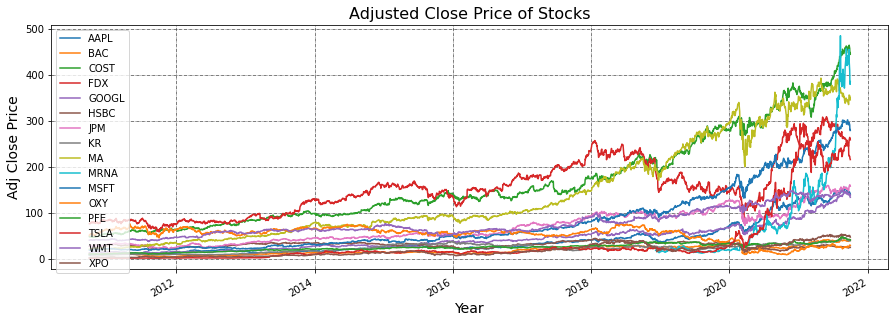

In [63]:
# Plot the adjusted close price
stocks.plot(figsize=(15, 5))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of Stocks" % stocks, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Adj Close Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

In [64]:
# Log of percentage change of all stocks in the list
ret = stocks.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO RETURN
ret.head()

,AAPL,BAC,COST,FDX,GOOGL,HSBC,JPM,KR,MA,MRNA,MSFT,OXY,PFE,TSLA,WMT,XPO
Date,,,,,,,,,,,,,,,,
2010-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,-0.004344,0.015152,0.008646,0.001636,-0.000323,0.024022,0.019514,0.002766,0.003476,NaN,-0.004502,0.031058,0.000582,0.009266,-0.002994,0.056863
2010-10-04,-0.013828,-0.011342,-0.007561,-0.002455,-0.006241,-0.002705,0.004890,-0.016713,-0.009566,NaN,-0.019466,-0.002231,-0.016432,0.018755,0.003928,0.081974
2010-10-05,0.036298,0.030703,0.001548,0.027706,0.029948,0.024466,0.017560,0.000468,0.014536,NaN,0.018235,0.022939,0.019338,0.006175,0.007995,0.013793
2010-10-06,0.000865,-0.012616,0.011533,-0.005137,-0.007235,-0.005491,0.006538,-0.007044,-0.011576,NaN,0.003280,0.005684,0.001739,-0.031749,0.010317,0.057666


### stocks return

<AxesSubplot:title={'center':'Stocks daily returns'}, xlabel='Date'>

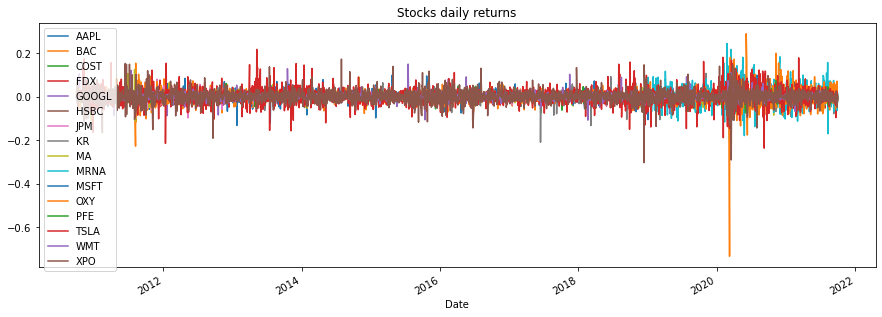

In [65]:
ret.plot(title='Stocks daily returns', figsize=(15, 5))

### Annual Return

In [66]:
ann_ret = ret.mean()*252
ann_ret

AAPL     0.253806
BAC      0.120245
COST     0.202471
FDX      0.094513
GOOGL    0.210992
HSBC    -0.009129
JPM      0.159381
KR       0.137843
MA       0.254774
MRNA     1.078374
MSFT     0.244385
OXY     -0.050129
PFE      0.125398
TSLA     0.477507
WMT      0.110706
XPO      0.263955
dtype: float64

### Annualized volatility

In [67]:
ann_risk = ret.std()*(252)**(0.5)
ann_risk

AAPL     0.281156
BAC      0.350869
COST     0.191409
FDX      0.286455
GOOGL    0.256173
HSBC     0.237548
JPM      0.283295
KR       0.261809
MA       0.274943
MRNA     0.797711
MSFT     0.252308
OXY      0.460935
PFE      0.202696
TSLA     0.553196
WMT      0.190190
XPO      0.494403
dtype: float64

### Stocks correlation matrix

In [68]:
corr_matrix = ret.corr()
corr_matrix

,AAPL,BAC,COST,FDX,GOOGL,HSBC,JPM,KR,MA,MRNA,MSFT,OXY,PFE,TSLA,WMT,XPO
AAPL,1.000000,0.380664,0.402519,0.395884,0.531489,0.337066,0.393200,0.175098,0.514656,0.096006,0.564913,0.281321,0.337309,0.326851,0.299853,0.287220
BAC,0.380664,1.000000,0.343442,0.536589,0.418765,0.625092,0.861353,0.211955,0.527619,-0.027929,0.440350,0.502655,0.416846,0.248493,0.268311,0.378861
COST,0.402519,0.343442,1.000000,0.391568,0.411328,0.283509,0.360755,0.405534,0.418721,0.131507,0.480159,0.196003,0.391331,0.217514,0.552568,0.192059
FDX,0.395884,0.536589,0.391568,1.000000,0.436430,0.465692,0.557027,0.240879,0.477926,0.030084,0.456794,0.410601,0.384655,0.269297,0.328388,0.410551
GOOGL,0.531489,0.418765,0.411328,0.436430,1.000000,0.380635,0.437070,0.171963,0.573543,0.062310,0.622220,0.320201,0.389893,0.320970,0.293772,0.309210
HSBC,0.337066,0.625092,0.283509,0.465692,0.380635,1.000000,0.658756,0.172976,0.485886,-0.033954,0.402964,0.433486,0.360579,0.229540,0.239906,0.331428
JPM,0.393200,0.861353,0.360755,0.557027,0.437070,0.658756,1.000000,0.214277,0.564203,-0.039948,0.481412,0.538743,0.460252,0.255805,0.296216,0.398371
KR,0.175098,0.211955,0.405534,0.240879,0.171963,0.172976,0.214277,1.000000,0.159172,0.097544,0.211441,0.120553,0.247456,0.113563,0.371907,0.099337
MA,0.514656,0.527619,0.418721,0.477926,0.573543,0.485886,0.564203,0.159172,1.000000,0.013295,0.584517,0.409947,0.443840,0.312594,0.307778,0.344595
MRNA,0.096006,-0.027929,0.131507,0.030084,0.062310,-0.033954,-0.039948,0.097544,0.013295,1.000000,0.102590,0.064551,0.189730,0.081200,0.128903,0.004112


### Correlation Heatmap

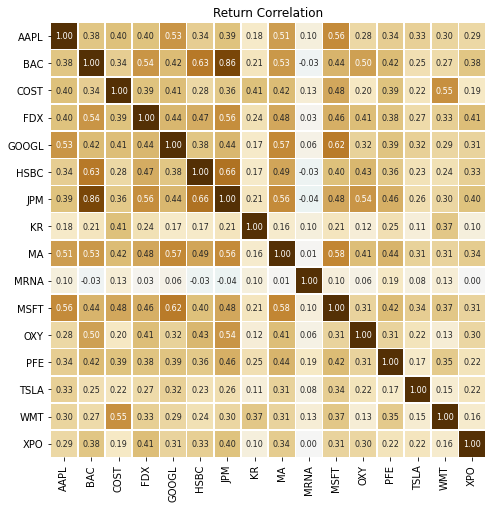

In [69]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, vmax=1, vmin=-1, center=0,
            linewidth=.5, square=True, annot=True, cbar=False,
            annot_kws={'size':8}, fmt='.2f', cmap='BrBG_r')
plt.title('Return Correlation')
plt.show()

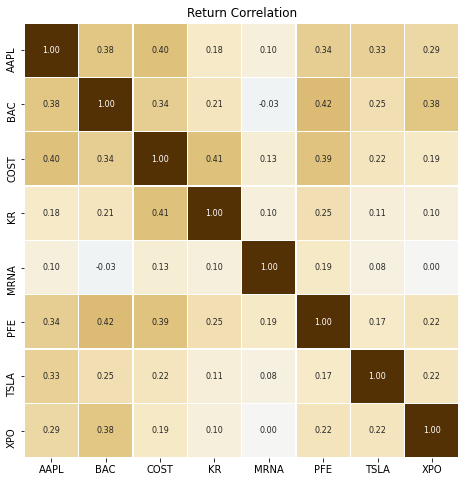

In [70]:
## dropping asset with correlation greater than .5
drop_asset = ["HSBC", "JPM", "WMT", "MA", "GOOGL", "MSFT", "FDX", "OXY"]
corr_matrix = ret.drop(drop_asset, 1).corr()
corr_matrix
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, vmax=1, vmin=-1, center=0,
            linewidth=.5, square=True, annot=True, cbar=False,
            annot_kws={'size':8}, fmt='.2f', cmap='BrBG_r')
plt.title('Return Correlation')
plt.show()

In [71]:
ret = ret.drop(drop_asset, 1)
stocks = stocks.drop(drop_asset, 1)

### Covariance Matrix

In [72]:
# Log of percentage change and creeate Covariance matrix
cov_matrix = ret.cov()
cov_matrix

,AAPL,BAC,COST,KR,MRNA,PFE,TSLA,XPO
AAPL,0.000314,0.000149,0.000086,0.000051,0.000107,0.000076,0.000202,0.000158
BAC,0.000149,0.000489,0.000092,0.000077,-0.000035,0.000118,0.000191,0.000261
COST,0.000086,0.000092,0.000145,0.000081,0.000094,0.000060,0.000091,0.000072
KR,0.000051,0.000077,0.000081,0.000272,0.000093,0.000052,0.000065,0.000051
MRNA,0.000107,-0.000035,0.000094,0.000093,0.002525,0.000159,0.000174,0.000007
PFE,0.000076,0.000118,0.000060,0.000052,0.000159,0.000163,0.000077,0.000089
TSLA,0.000202,0.000191,0.000091,0.000065,0.000174,0.000077,0.001214,0.000236
XPO,0.000158,0.000261,0.000072,0.000051,0.000007,0.000089,0.000236,0.000970


### Portfolio Assets

In [73]:
ret.columns

Index(['AAPL', 'BAC', 'COST', 'KR', 'MRNA', 'PFE', 'TSLA', 'XPO'], dtype='object')

In [74]:
1/8

0.125

### Randomly weighted portfolio's variance

In [50]:
# Randomly weighted portfolio's variance
w = {'KR':0.125, 'PFE':0.125, 'MA':0.125, 'AAPL':0.125,'JPM':0.125,'FDX':0.125,'XPO':0.125,'WMT':0.125}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
ann_port_std = (port_var*252)**(0.5)
port_var

4.180486931351388e-05

In [51]:
port_var*252

0.010534827067005498

In [52]:
ann_port_std

0.10263930566311084

In [53]:
# Yearly returns for individual companies
ind_er = stocks.resample('Y').last().pct_change().mean()
ind_er

AAPL    0.307057
BAC     0.207140
COST    0.216337
KR      0.169954
MRNA    2.435291
PFE     0.135860
TSLA    1.133088
XPO     0.337829
dtype: float64

### Port-folio return

In [54]:
# Portfolio returns
w = list(w.values())
port_er = (w*ind_er).sum()
port_er

0.6178195610811815

In [55]:
# Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/year.
ann_sd = stocks.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

AAPL    0.281156
BAC     0.350869
COST    0.191409
KR      0.261809
MRNA    0.797711
PFE     0.202696
TSLA    0.553196
XPO     0.494403
dtype: float64

In [56]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,0.307057,0.281156
BAC,0.207140,0.350869
COST,0.216337,0.191409
KR,0.169954,0.261809
MRNA,2.435291,0.797711
PFE,0.135860,0.202696
TSLA,1.133088,0.553196
XPO,0.337829,0.494403


In [77]:
ann_sd

AAPL    0.281156
BAC     0.350869
COST    0.191409
KR      0.261809
MRNA    0.797711
PFE     0.202696
TSLA    0.553196
XPO     0.494403
dtype: float64

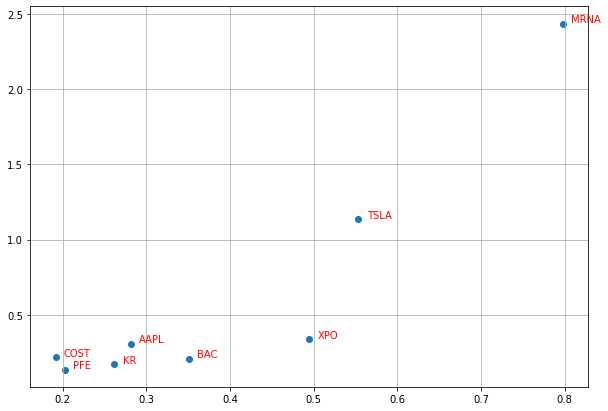

In [82]:
plt.subplots(figsize=(10, 7))
plt.grid()
x = ann_sd # RISK
y = ind_er # Return
plt.scatter(x, y)
for i in range(len(x)):
    plt.text(x=x[i]+0.01, y=y[i]+0.01, s=x.index[i], 
          fontdict=dict(color="red", size=10),
          )
plt.show()

In [27]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_assets = len(stocks.columns)
num_portfolios = 100_000

In [28]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
    # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Daily standard deviation
    ann_sd = sd*np.sqrt(252) #Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [29]:
data = {'Returns':p_ret, 'Volatility':p_vol}
for counter, symbol in enumerate(stocks.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)

In [30]:
portfolios["Sharp-Ratio"] = portfolios["Returns"]/portfolios["Volatility"]
curve = portfolios[(portfolios["Sharp-Ratio"]<=1.5) |  (portfolios["Sharp-Ratio"]>=3.5)]
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,BAC weight,COST weight,KR weight,MRNA weight,PFE weight,TSLA weight,XPO weight,Sharp-Ratio
0,1.046988,0.323021,0.073768,0.131478,0.063409,0.106310,0.352996,0.153836,0.056379,0.061824,3.241243
1,0.733815,0.242971,0.225653,0.071883,0.006869,0.230824,0.217338,0.165720,0.037120,0.044592,3.020171
2,0.464383,0.230286,0.067980,0.120522,0.134915,0.060796,0.031847,0.177296,0.176049,0.230596,2.016554
3,0.627100,0.210759,0.043849,0.127320,0.189454,0.163528,0.155126,0.194749,0.090149,0.035826,2.975442
4,0.585394,0.219796,0.142469,0.089396,0.119129,0.163234,0.079958,0.091321,0.196468,0.118025,2.663353


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

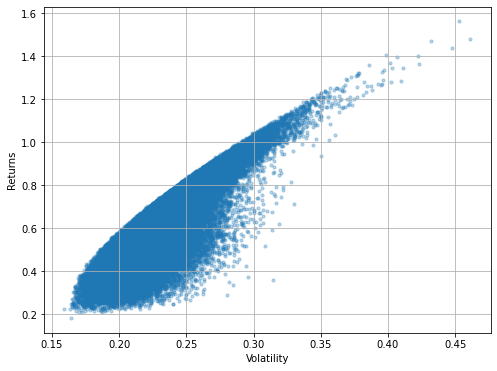

In [31]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[8, 6])

In [32]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns        0.225103
Volatility     0.159314
AAPL weight    0.140683
BAC weight     0.000756
COST weight    0.267137
KR weight      0.157369
MRNA weight    0.013687
PFE weight     0.394097
TSLA weight    0.001840
XPO weight     0.024432
Sharp-Ratio    1.412955
Name: 43918, dtype: float64

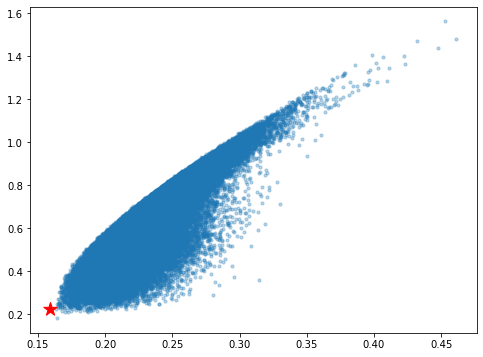

In [33]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[8, 6])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [34]:
# Finding the optimal portfolio
rf = 0.05 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        1.405042
Volatility     0.398472
AAPL weight    0.068865
BAC weight     0.023277
COST weight    0.054948
KR weight      0.006991
MRNA weight    0.390008
PFE weight     0.031020
TSLA weight    0.337578
XPO weight     0.087314
Sharp-Ratio    3.526071
Name: 38294, dtype: float64

### Efficient Frontier

Text(0.5, 1.0, 'Efficient Frontier')

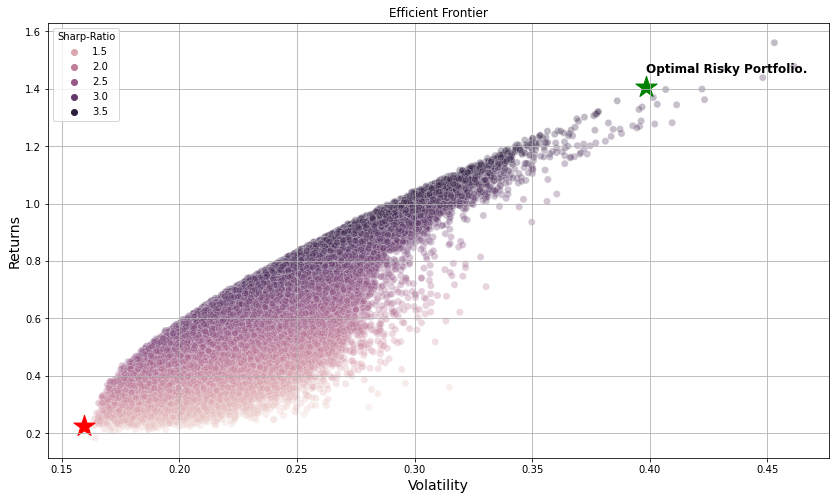

In [35]:
# Plotting optimal portfolio
plt.subplots(figsize=(14, 8))
plt.grid()
sns.scatterplot(x='Volatility', y='Returns', data=portfolios, hue="Sharp-Ratio", marker='o', s=50, alpha=0.3)
#sns.scatterplot(x='Volatility', y='Returns', data=curve, marker='_', s=100, alpha=0.6, color='r')
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.text(optimal_risky_port[1], optimal_risky_port[0]+.05, "Optimal Risky Portfolio.", size='large', color='black', weight='bold')
plt.ylabel('Returns', fontsize=14)
plt.xlabel('Volatility', fontsize=14)
plt.title("Efficient Frontier")

In [37]:
optimal_risky_port*100

Returns        140.504196
Volatility      39.847242
AAPL weight      6.886482
BAC weight       2.327731
COST weight      5.494788
KR weight        0.699054
MRNA weight     39.000778
PFE weight       3.101980
TSLA weight     33.757790
XPO weight       8.731397
Sharp-Ratio    352.607076
Name: 38294, dtype: float64

In [83]:
6.886482 + 2.327731 + 5.494788 + 0.699054 + 39.000778 + 3.101980 + 33.757790 + 8.731397

100.0